## Bikesharing in Seoul

### Source
 * https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

---------------------

### Exploration

    1. Find outliers

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import yaml
import matplotlib.pyplot as plt

In [3]:

with open('../params.yaml') as file:
    config = yaml.safe_load(file)


#config
#config['data']['bike_rentals_raw']

In [4]:
df = pd.read_csv(config['data']['csv_cleaned'])
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,daytime,temperature_type
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,Night,Frost
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,Night,Frost
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No,Yes,Night,Frost
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No,Yes,Night,Frost
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No,Yes,Morning,Frost


In [36]:
df.groupby('hour').agg({'rented_bike_count':'mean'})

,rented_bike_count
hour,
0,541.460274
1,426.183562
2,301.630137
3,203.331507
4,132.591781
5,139.082192
6,287.564384
7,606.005479
8,1015.701370


In [5]:
def show_unique_values(df):
    for col in df.columns:
        print(f"COLUMN '{col}' ({df[col].dtype})")
        #if df[col].dtype == np.number:
        #    print(df[col].nunique())
        #else:
        print(df[col].unique())
        print()
        
show_unique_values(df)

COLUMN 'date' (object)
['2017-12-01' '2017-12-02' '2017-12-03' '2017-12-04' '2017-12-05'
 '2017-12-06' '2017-12-07' '2017-12-08' '2017-12-09' '2017-12-10'
 '2017-12-11' '2017-12-12' '2017-12-13' '2017-12-14' '2017-12-15'
 '2017-12-16' '2017-12-17' '2017-12-18' '2017-12-19' '2017-12-20'
 '2017-12-21' '2017-12-22' '2017-12-23' '2017-12-24' '2017-12-25'
 '2017-12-26' '2017-12-27' '2017-12-28' '2017-12-29' '2017-12-30'
 '2017-12-31' '2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04'
 '2018-01-05' '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09'
 '2018-01-10' '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14'
 '2018-01-15' '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19'
 '2018-01-20' '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24'
 '2018-01-25' '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29'
 '2018-01-30' '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03'
 '2018-02-04' '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08'
 '2018-02-09' '2018-02-10' '2018-02-11' '2018-02-12' 

In [62]:
def get_outliers(data):
    df = data.copy()

    d = {}
    for col in df.select_dtypes(np.number).columns:
        
        iqr = np.percentile(df[col], 75) - np.percentile(df[col], 25)
        upper_limit = np.percentile(df[col],75) + 1.5*iqr
        lower_limit = np.percentile(df[col],25) - 1.5*iqr
        
        d[col] = df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]

    return d

def get_outliers_df(data, column):
    iqr = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    upper_limit = np.percentile(data[column],75) + 1.5*iqr
    lower_limit = np.percentile(data[column],25) - 1.5*iqr
    return data[(data[column] < lower_limit) | (data[column] > upper_limit)]

In [59]:
out = get_outliers(df)
out

{'rented_bike_count': 158,
 'hour': 0,
 'temperature': 0,
 'humidity': 0,
 'wind_speed': 161,
 'visibility': 0,
 'dew_point_temperature': 0,
 'solar_radiation': 641,
 'rainfall': 528,
 'snowfall': 443}

In [64]:
out_df = get_outliers_df(df, 'rented_bike_count')
out_df

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,daytime,temperature_type
2946,2018-04-02,2401,18,20.7,54,4.1,1484,11.0,0.50,0.0,0.0,Spring,No,Yes,Evening,Warm
2994,2018-04-04,2402,18,16.0,47,2.1,2000,4.6,0.79,0.0,0.0,Spring,No,Yes,Evening,Mild
3114,2018-04-09,2401,18,14.8,24,1.3,1514,-5.6,0.69,0.0,0.0,Spring,No,Yes,Evening,Mild
3210,2018-04-13,2404,18,17.5,18,1.3,2000,-7.1,0.23,0.0,0.0,Spring,No,Yes,Evening,Mild
3282,2018-04-16,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No,Yes,Evening,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,2018-10-19,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No,Yes,Evening,Mild
7818,2018-10-22,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No,Yes,Evening,Mild
7842,2018-10-23,2415,18,14.5,71,2.1,1235,9.2,0.06,0.0,0.0,Autumn,No,Yes,Evening,Mild
7866,2018-10-24,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No,Yes,Evening,Mild


In [50]:
def plot_outliers(data):
    fig,ax = plt.subplots(2,4, figsize=(7,5))
    plt.tight_layout()
    ax[0,0].set_title('rented_bike_count')
    sns.boxplot(df['rented_bike_count'], ax=ax[0,0], color='red')
    ax[0,1].set_title('temperature')
    sns.boxplot(df['temperature'], ax=ax[0,1])
    ax[0,2].set_title('humidity')
    sns.boxplot(df['humidity'], ax=ax[0,2])
    ax[0,3].set_title('visibility')
    sns.boxplot(df['visibility'], ax=ax[0,3])
    ax[1,0].set_title('dew_point_temperature')
    sns.boxplot(df['dew_point_temperature'], ax=ax[1,0])
    ax[1,1].set_title('solar_radiation')
    sns.boxplot(df['solar_radiation'], ax=ax[1,1], color='red')
    ax[1,2].set_title('rainfall')
    sns.boxplot(df['rainfall'], ax=ax[1,2], color='red')
    ax[1,3].set_title('snowfall')
    sns.boxplot(df['snowfall'], ax=ax[1,3], color='red')
    plt.show()

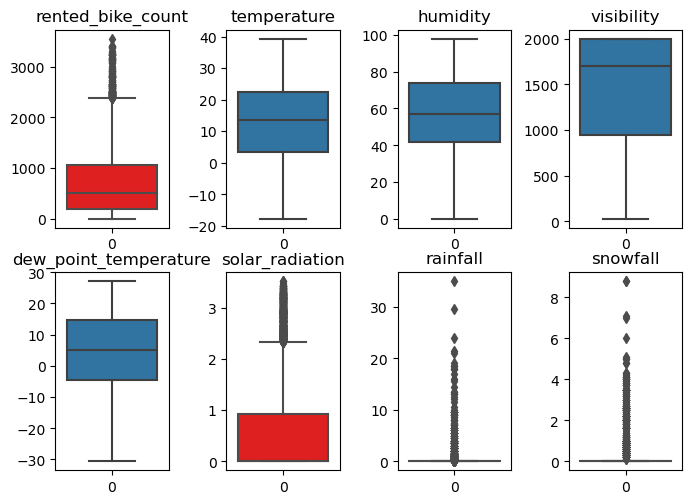

In [51]:
plot_outliers(df)

In [81]:
df['holiday'].value_counts()

No     8328
Yes     432
Name: holiday, dtype: int64

In [82]:
df['functioning_day'].value_counts()

Yes    8465
No      295
Name: functioning_day, dtype: int64

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rented_bike_count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
solar_radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


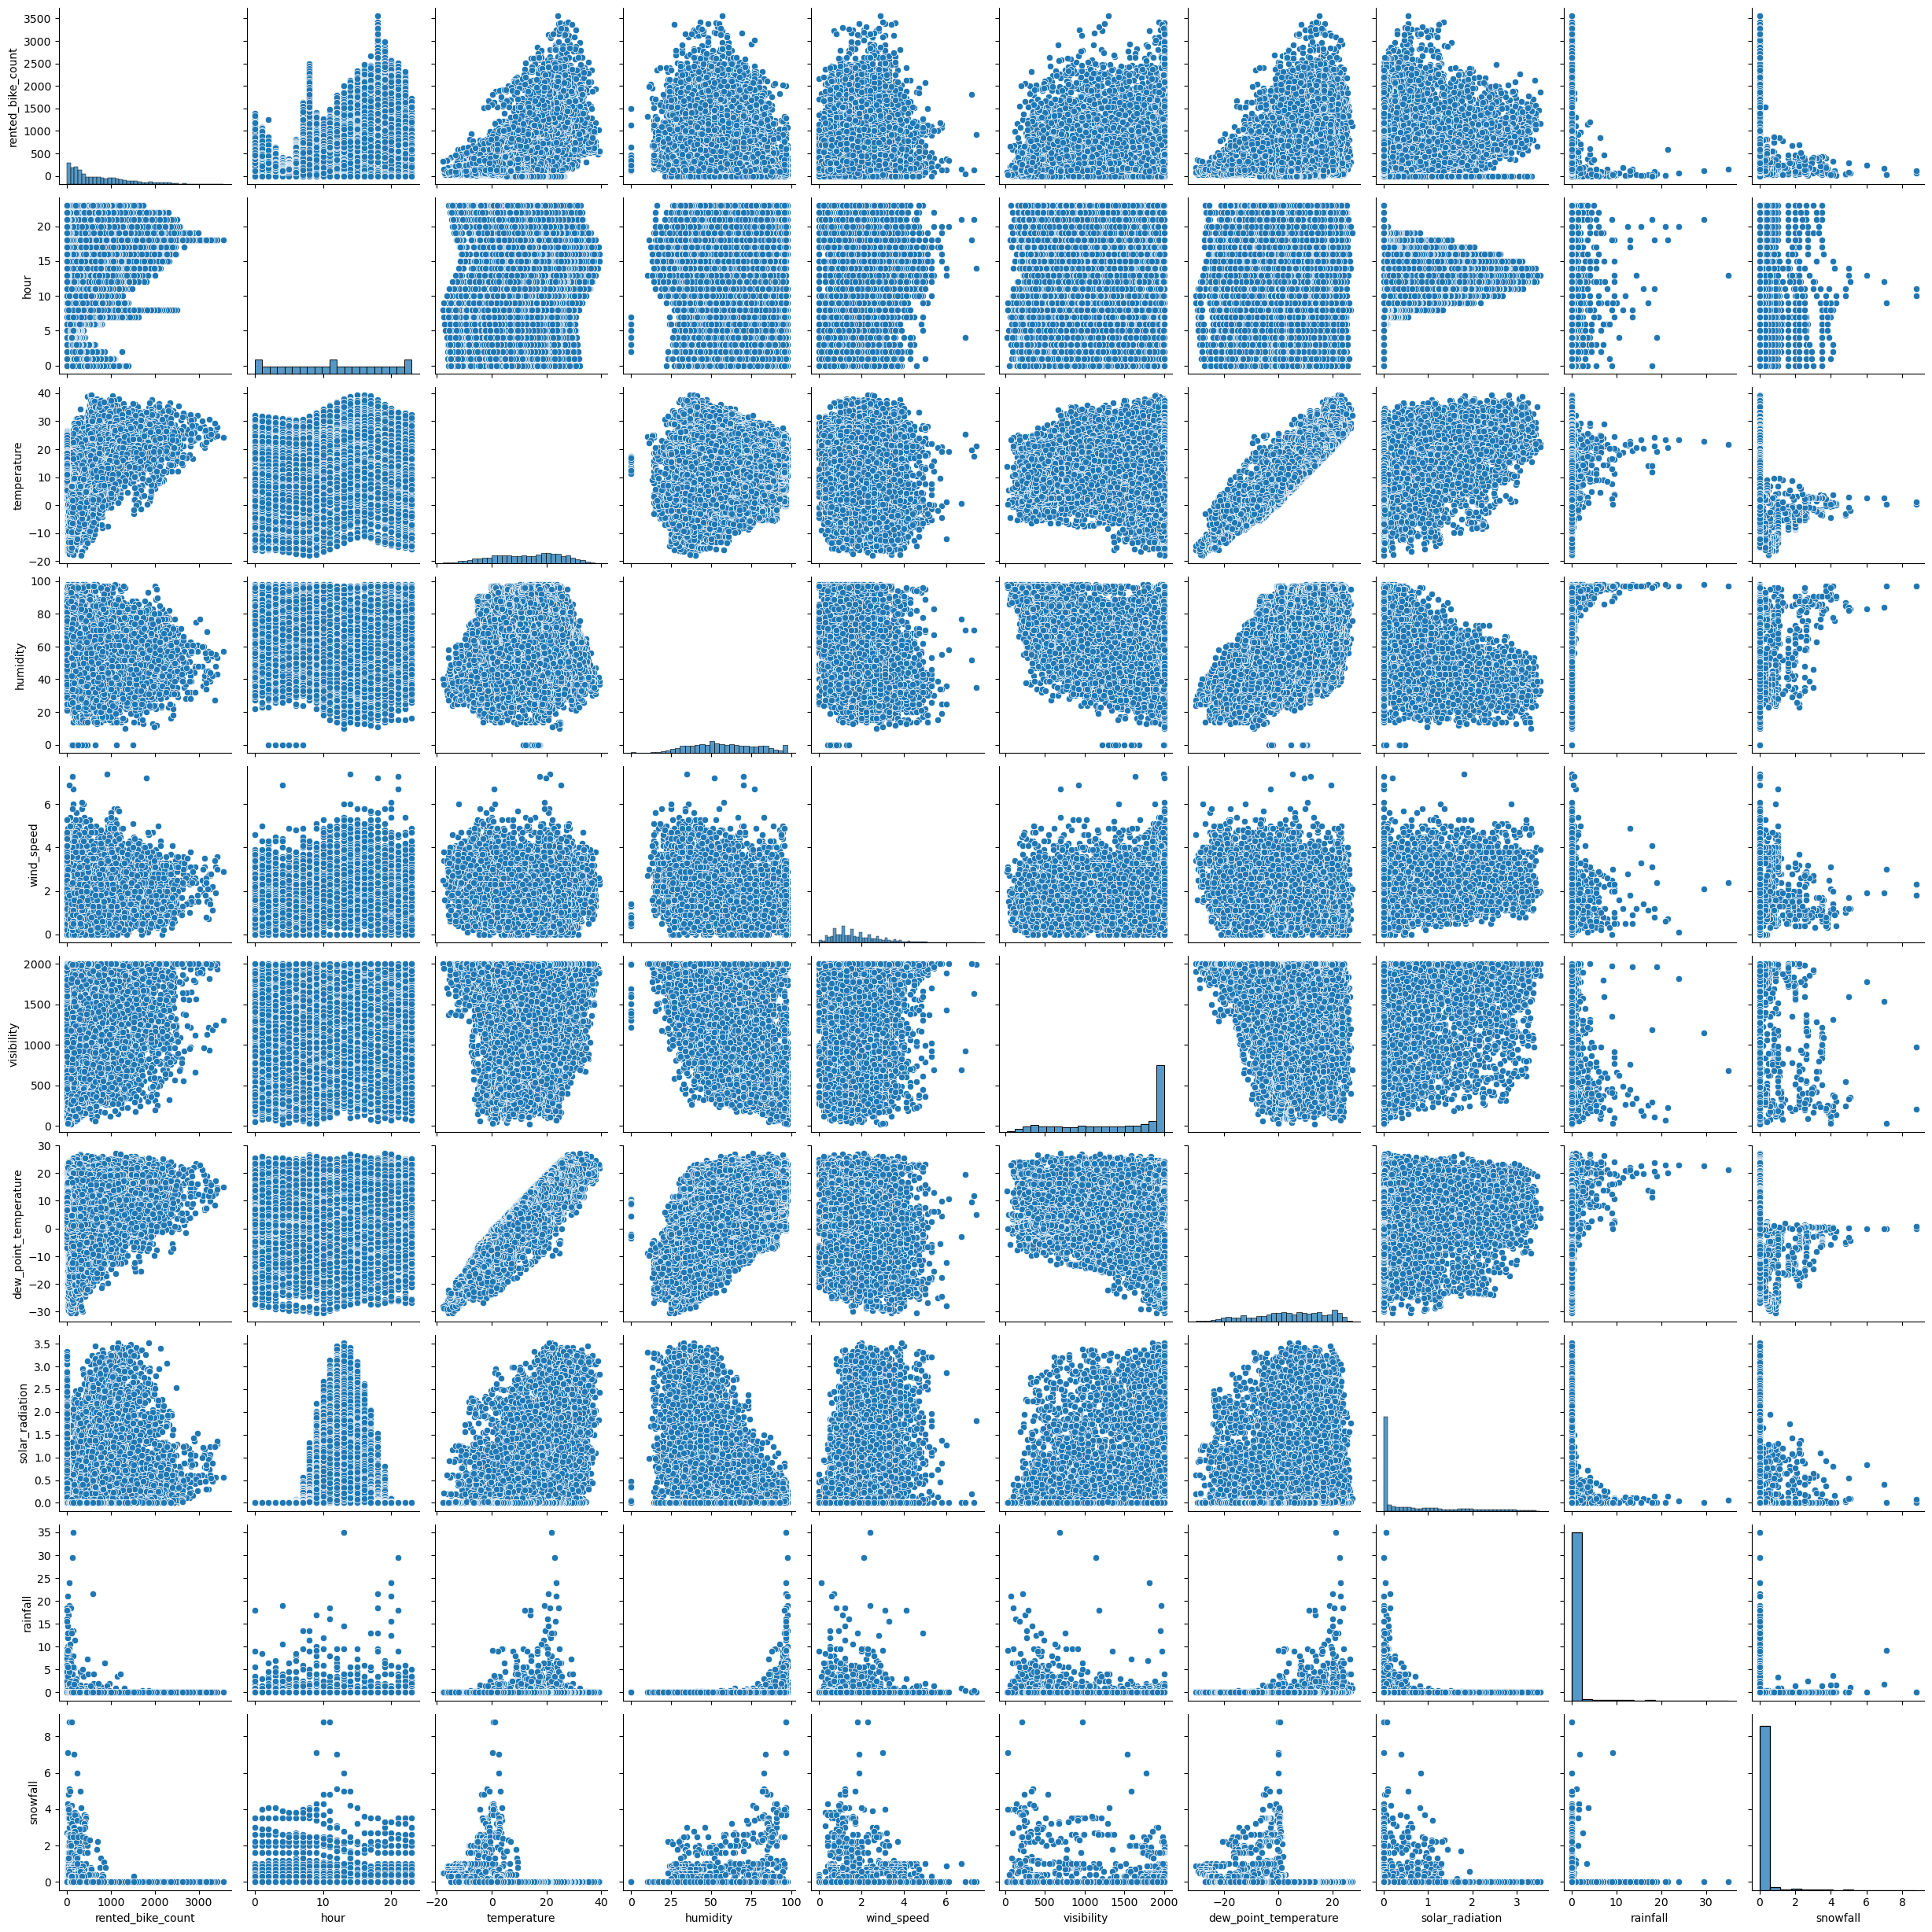

In [32]:
#sns.boxplot(x=df['temperature'], y=df['dew_point_temperature'])
#sns.lineplot(x=df['solar_radiation'], y=df['rented_bike_count'])
sns.pairplot(df)

In [83]:
#sns.heatmap(df.corr(), annot=True)